In [2]:
import os
import shutil
import random



In [1]:
original_dataset_dir ='/content/drive/MyDrive/Colab Notebooks/image_classification/dataset'

In [3]:
base_dir = '/content/drive/MyDrive/Colab Notebooks/image_classification/dataset'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [4]:
for folder in [base_dir,train_dir,test_dir]:
  if not os.path.exists(folder):
    os.makedirs(folder)

In [5]:
train_split = 0.8
test_split = 0.2

In [ ]:
# Loop through each class
for class_name in os.listdir(original_dataset_dir):
    class_path = os.path.join(original_dataset_dir, class_name)
    if not os.path.isdir(class_path):
        continue

    images = [img for img in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, img))]
    random.shuffle(images)

    train_size = int(len(images) * train_split)
    train_images = images[:train_size]
    test_images = images[train_size:]

    # Create class subfolders
    train_class_dir = os.path.join(train_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.makedirs(train_class_dir, exist_ok=True)
    os.makedirs(test_class_dir, exist_ok=True)

    # Copy images
    for img in train_images:
        src_path = os.path.join(class_path, img)
        dst_path = os.path.join(train_class_dir, img)
        if os.path.isfile(src_path):  # Add this check
            shutil.copy(src_path, dst_path)
    for img in test_images:
        src_path = os.path.join(class_path, img)
        dst_path = os.path.join(test_class_dir, img)
        if os.path.isfile(src_path):  # Add this check
            shutil.copy(src_path, dst_path)

print("✅ Dataset split complete!")

✅ Dataset split complete!


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of train for validation
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1491 images belonging to 17 classes.
Found 365 images belonging to 17 classes.
Found 702 images belonging to 17 classes.


In [ ]:
from tensorflow.keras import layers, models

num_classes = train_data.num_classes

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=img_size+(3,)),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 17)             │         4,369 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,520,401 (24.87 MB)

 Trainable params: 6,520,401 (24.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=15
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.0987 - loss: 2.7596 - val_accuracy: 0.2466 - val_loss: 2.4289
Epoch 2/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.2227 - loss: 2.3659 - val_accuracy: 0.2822 - val_loss: 2.2227
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.3654 - loss: 2.0242 - val_accuracy: 0.3425 - val_loss: 2.0809
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.4036 - loss: 1.8674 - val_accuracy: 0.3836 - val_loss: 1.9658
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.4890 - loss: 1.6057 - val_accuracy: 0.3699 - val_loss: 2.0743
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.5177 - loss: 1.4951 - val_accuracy: 0.4055 - val_loss: 2.0267
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5472 - loss: 1.4041 - val_accuracy: 0.3781 - val_loss: 2.0492
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.6065 - loss: 1.1910 - val_accuracy: 0.4603 - val_loss:

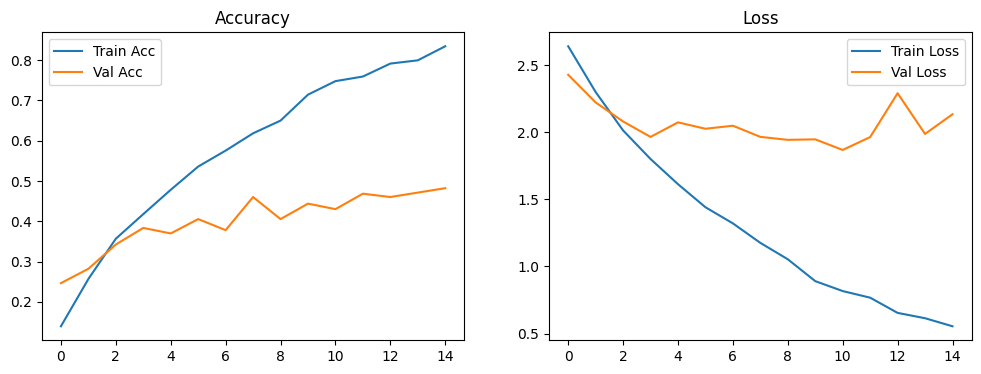

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_data)
print(f"✅ Test Accuracy: {test_acc:.2f}")

22/22 ━━━━━━━━━━━━━━━━━━━━ 12s 542ms/step - accuracy: 0.7398 - loss: 1.0710
✅ Test Accuracy: 0.74


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/drive/MyDrive/Colab Notebooks/image_classification/dataset/test/Bear/Bear_27.jpeg'  # path to any test image
img = image.load_img(img_path, target_size=img_size)
x = image.img_to_array(img) / 255.0
x = np.expand_dims(x, axis=0)

pred = model.predict(x)
class_names = list(train_data.class_indices.keys())
print("Predicted Class:", class_names[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted Class: Bear
